In [9]:
import os
import nibabel as nib
import skimage.io as io
import matplotlib.pyplot as plt # plt is used for showing the image
import matplotlib.image as mpimg # mpimg is used for read in the image
import numpy as np
from PIL import Image
from dipy.align.imwarp import SymmetricDiffeomorphicRegistration
from dipy.align.imwarp import DiffeomorphicMap
from dipy.align.metrics import CCMetric
import os.path
from dipy.viz import regtools
from dipy.align.imaffine import (AffineMap,MutualInformationMetric,AffineRegistration)
from dipy.align.transforms import (TranslationTransform3D,RigidTransform3D,AffineTransform3D)

In [10]:
# The mismatch metric
metric = CCMetric(3)
# The optimization strategy:
level_iters = [10, 10, 5]
# Registration object
sdr = SymmetricDiffeomorphicRegistration(metric, level_iters)

In [11]:
in1='/Users/zhenhu/Documents/ndd/Downloads/ndmg_outputs/sub-0025864/ses-1/anat/preproc/t1w_brain_nores.nii.gz'
ref1='/usr/local/fsl/data/standard/MNI152_T1_2mm_brain.nii.gz'
#iout='/Users/zhenhu/Documents/ndd/Downloads/ndmg_outputs/sub-0025864/ses-1/anat/preproc/t1w_aligned_mni.nii.gz'
#cout='/Users/zhenhu/Desktop/outputs/warp_t12mni.nii.gz'

In [12]:
in1_img = nib.load(in1)
ref1_img = nib.load(ref1)

In [13]:
in1_img_data = in1_img.get_data()
in1_img_affine = in1_img.affine
ref1_img_data = ref1_img.get_data()
ref1_img_affine = ref1_img.affine

In [14]:
print("This is the shape of the in1 image:",in1_img.shape)
print("This is the shape of in1 image data:",in1_img_data.shape)
print("This is the shape of the in1 image's affine matrix:",in1_img_affine)

This is the shape of the in1 image: (96, 128, 128)
This is the shape of in1 image data: (96, 128, 128)
This is the shape of the in1 image's affine matrix: [[   2.           -0.           -0.          -88.9927063 ]
 [  -0.            2.           -0.         -112.91127014]
 [   0.            0.            2.         -122.95181274]
 [   0.            0.            0.            1.        ]]


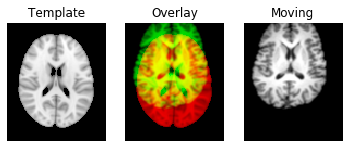

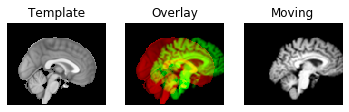

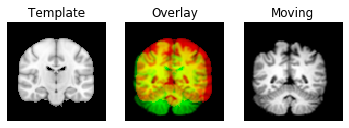

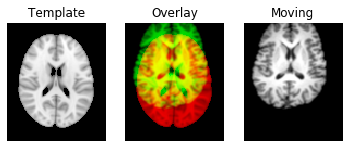

In [15]:
identity = np.eye(4)
affine_map = AffineMap(identity,template_data.shape, template_affine,moving_data.shape, moving_affine)
resampled = affine_map.transform(moving_data)
regtools.overlay_slices(template_data, resampled, None, 0,"Template", "Moving")
regtools.overlay_slices(template_data, resampled, None, 1,"Template", "Moving")
regtools.overlay_slices(template_data, resampled, None, 2,"Template", "Moving")